In [53]:
import re
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import lxml
import numpy as np
import seaborn as sns

Crawl down the career information from www.seek.com.au  
The parameters are posted with URL, so we can easily post the form by editing the url.  
Salary details are listed in the &lt;span&gt; of &lt;a&gt; with class="lwHBT6d".  

In [54]:
def get_links(url, label_name='a', constraint=None):
    r = requests.get(url)
    links = set()
    for l in BeautifulSoup(r.text).find_all(label_name):
        if constraint == None or (l.get(constraint[0]) != None and constraint[1] in l.get(constraint[0])):
            links.add(l.text)
    return list(links)

In [55]:
def crawl_salary(keyword, location, page):
    url = 'https://www.seek.com.au/%s-jobs/in-%s' % (keyword, location)
    salary = []
    for p in range(1, page):
        for j in get_links(url + '?page=%d' % p, label_name='span', constraint=['class', 'lwHBT6d']):
            if len(re.findall('\$\d+[kK]*', j)) > 0:
                salary.append(j)

    n_salary = []
    for i in salary:
        s = re.sub(',', '', i)  # remove ',' as the separator in salary
        s = re.sub('k|K', '000', s)  # substitute K or k with 000
        s = re.findall('(?<=\$)\d{4}\d+', s)  # Only find salary with more than 10k per year.
        if len(s)>1:
            avg = sum(map(lambda x:int(x), s)) / len(s)
        elif s!=[]:
            avg = int(s[0])
        else:
            continue
        n_salary.append(avg)
    
    return n_salary

In [56]:
location = 'melbourne'
page = 10
salary_dict = {
    'java':...,
    'python':...
}
for k in salary_dict.keys():
    salary_dict[k] = crawl_salary(k, location, page)

In [60]:
url = 'https://www.seek.com.au/%s-jobs/in-%s' % ('python', location)
salary = []
for p in range(1, page):
    for j in get_links(url + '?page=%d' % p, label_name='span', constraint=['class', 'lwHBT6d']):
        if len(re.findall('\$\d+[kK]*', j)) > 0:
            salary.append(j)

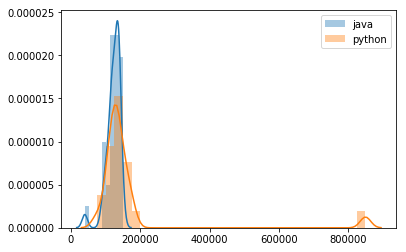

In [57]:
for k,v in salary_dict.items():
    sns.distplot(v)
plt.legend(salary_dict.keys())

We can see a annual salary of more than 800k, we will label it as an outlier.

In [74]:
for s in salary_dict['python']:
    if s > 800000:
        salary_dict['python'].remove(s)

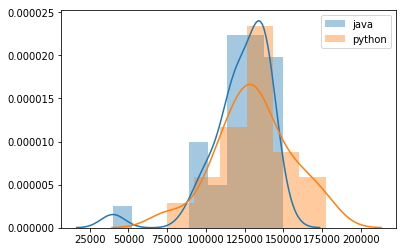

In [75]:
for k,v in salary_dict.items():
    sns.distplot(v)
plt.legend(salary_dict.keys())